In [36]:
import numpy as np
import pandas as pd
from scipy import signal
from scipy.integrate import simps
import pywt
from scipy.fft import fft
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class Feature():

    def __init__(self, channels, readings, filename = "data.csv"):
        # name of file where data is being stored along with extension
        self.filename = filename
        self.channels = channels
        self.readings = readings
        self.delta_values = []
        self.theta_values = []
        self.alpha_values = []
        self.beta_values = []
        arr = range(self.readings)
        self.feature = pd.DataFrame(arr, columns=['Redundant'])
        self.feature.to_csv('feature.csv')

    # function plots welchs periodogram and calculates area under the curve for respective frequency band using composite simpsons rules
    def relative_psd(self):
        fs = 128
        t = 3
        # t is the duration of the signal, this value must be same is record.py and stimuli/cues.py as well

        # N = fs * t

        win_length = 4*fs
        # window length is normally 2/Lowest freq of interest which is 0.5 in our case thus the window length is 4 seconds

        data = pd.read_csv(self.filename)
        data.to_csv('data1.csv', header = False)
        data = pd.read_csv("data1.csv")
        # getting rid of garbage headers

        arr = range(self.readings)
        feature = pd.DataFrame(arr, columns=['Redundant'])
        feature.to_csv('feature.csv')
        

        for i in self.channels:

            indices = np.linspace(0, data[i].size, self.readings, dtype=int)
            k=0
            for j in range(self.readings) :
                freqs, psd = signal.welch(data[i].iloc[indices[k] : indices[k+1]], fs,)
                # nperseg=win_length

                """
                plt.plot(freqs, psd, color='k', lw=2)
                plt.xlabel('Frequency')
                plt.ylabel('Power spectral density')
                plt.title("Welch's periodogram")
                """

                # delta band 
                low = 0.5
                high = 4
                delta = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                delta_power = simps(psd[delta], dx=freq_res)

                total_power = simps(psd, dx=freq_res)

                delta_rel_power = delta_power / total_power
                self.delta_values.append(delta_rel_power)

                # print('relative delta power = %.3f '% delta_rel_power)

                # theta band 
                low = 4
                high = 8
                theta = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                theta_power = simps(psd[theta], dx=freq_res)
                theta_rel_power = theta_power / total_power
                # print('relative theta power = %.3f '% theta_rel_power)
                self.theta_values.append(theta_rel_power)

                # alpha band 
                low = 8
                high = 12
                alpha = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                alpha_power = simps(psd[alpha], dx=freq_res)
                alpha_rel_power = alpha_power / total_power
                # print('relative alpha power = %.3f '% alpha_rel_power)
                self.alpha_values.append(alpha_rel_power)

                # beta band 
                low = 12
                high = 30
                beta = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                beta_power = simps(psd[beta], dx=freq_res)
                beta_rel_power = beta_power / total_power
                # print('relative beta power = %.3f '% beta_rel_power)
                self.beta_values.append(beta_rel_power)
                k=k+1

            self.save_to_file(i, self.feature)
            self.delta_values = []
            self.theta_values = []
            self.alpha_values = []
            self.beta_values = []

        

        self.feature = self.feature.drop('Redundant', axis=1)
        self.feature.to_csv('feature.csv')

    def wavelet(self, channel):
        data = pd.read_csv(self.filename)
        sig = data[channel]
        dec=pywt.wavedec(sig, wavelet = 'db4', level=4)

    def save_to_file(self, channel, feature):
        feature[channel+'delta'] = self.delta_values
        feature[channel+'theta'] = self.theta_values
        feature[channel+'alpha'] = self.alpha_values
        feature[channel+'beta'] = self.beta_values

In [8]:
channels = ['EEG.AF3','EEG.F7','EEG.F3','EEG.FC5','EEG.T7','EEG.P7','EEG.O1','EEG.O2','EEG.P8','EEG.T8','EEG.FC6','EEG.F4','EEG.F8','EEG.AF4']

In [11]:
obj = Feature(channels)

TypeError: __init__() missing 1 required positional argument: 'readings'

In [12]:
obj.relative_psd()

NameError: name 'obj' is not defined

In [13]:
data = pd.read_csv('data.csv')
data.to_csv('data1.csv', header = False)
data = pd.read_csv("data1.csv")

In [14]:
data['EEG.AF3'].iloc[1:4]

1    4223.461426
2    4228.846191
3    4220.384766
Name: EEG.AF3, dtype: float64

In [15]:
indices = np.linspace(0, data['EEG.AF3'].size, 5,dtype=int)

In [16]:
indices[1]

162

In [17]:
data['EEG.AF3'].iloc[indices[0] : indices[1]]

0      4218.717773
1      4223.461426
2      4228.846191
3      4220.384766
4      4205.128418
          ...     
157    4180.512695
158    4178.717773
159    4187.307617
160    4189.743652
161    4187.051270
Name: EEG.AF3, Length: 162, dtype: float64

In [28]:
 df = pd.read_csv(r"C:/Users/KHALS/OneDrive/Desktop/professorX/prototype/sequence.csv")


In [31]:
markers = df["Sequence"].to_numpy()


In [32]:
name = 'EEG.AF3'

NameError: name 'df1' is not defined

In [36]:
arr = range(5)
df = pd.DataFrame(arr, columns=['Redundant'])
df.to_csv('feature.csv')

In [1]:
df.drop[]

SyntaxError: invalid syntax (<ipython-input-1-bb1f4eb13d59>, line 1)

In [6]:
        fs = 128
        t = 3
        # t is the duration of the signal, this value must be same is record.py and stimuli/cues.py as well

        # N = fs * t

        win_length = 4*fs
        # window length is normally 2/Lowest freq of interest which is 0.5 in our case thus the window length is 4 seconds

        data = pd.read_csv('data.csv')
        data.to_csv('data1.csv', header = False)
        data = pd.read_csv("data1.csv")
        # getting rid of garbage headers

        arr = range(5)
        feature = pd.DataFrame(arr, columns=['Redundant'])
        feature.to_csv('feature.csv')
        

        for i in self.channels:

            indices = np.linspace(0, data[i].size,5, dtype=int)
            k=0
            for j in range(self.readings) :
                freqs, psd = signal.welch(data[i].iloc[indices[k] : indices[k+1]], fs,)
                # nperseg=win_length

                """
                plt.plot(freqs, psd, color='k', lw=2)
                plt.xlabel('Frequency')
                plt.ylabel('Power spectral density')
                plt.title("Welch's periodogram")
                """

                # delta band 
                low = 0.5
                high = 4
                delta = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                delta_power = simps(psd[delta], dx=freq_res)

                total_power = simps(psd, dx=freq_res)

                delta_rel_power = delta_power / total_power
                self.delta_values.append(delta_rel_power)

                # print('relative delta power = %.3f '% delta_rel_power)

                # theta band 
                low = 4
                high = 8
                theta = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                theta_power = simps(psd[theta], dx=freq_res)
                theta_rel_power = theta_power / total_power
                # print('relative theta power = %.3f '% theta_rel_power)
                self.theta_values.append(theta_rel_power)

                # alpha band 
                low = 8
                high = 12
                alpha = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                alpha_power = simps(psd[alpha], dx=freq_res)
                alpha_rel_power = alpha_power / total_power
                # print('relative alpha power = %.3f '% alpha_rel_power)
                self.alpha_values.append(alpha_rel_power)

                # beta band 
                low = 12
                high = 30
                beta = np.logical_and(freqs >= low, freqs <= high)
                freq_res = freqs[1] - freqs[0] 
                beta_power = simps(psd[beta], dx=freq_res)
                beta_rel_power = beta_power / total_power
                # print('relative beta power = %.3f '% beta_rel_power)
                self.beta_values.append(beta_rel_power)
                k=k+1

            
            delta_values = []
            theta_values = []
            alpha_values = []
            beta_values = []

        

        self.feature = self.feature.drop('Redundant', axis=1)
        self.feature.to_csv('feature.csv')


NameError: name 'self' is not defined

In [26]:
indices = np.linspace(0, data['EEG.AF3'].size, 6, dtype=int)

In [18]:
data['EEG.AF3']

0      4218.717773
1      4223.461426
2      4228.846191
3      4220.384766
4      4205.128418
          ...     
644    4179.102539
645    4173.461426
646    4174.230957
647    4177.051270
648    4180.769043
Name: EEG.AF3, Length: 649, dtype: float64

In [30]:
data['EEG.AF3'].iloc[indices[4] : indices[5]]

519    4177.436035
520    4179.358887
521    4184.358887
522    4193.205078
523    4199.358887
          ...     
644    4179.102539
645    4173.461426
646    4174.230957
647    4177.051270
648    4180.769043
Name: EEG.AF3, Length: 130, dtype: float64

In [25]:
for i in range(5):
    print(i)

0
1
2
3
4


In [6]:
len(channels)

14

In [30]:
x = data['EEG.AF3']

In [31]:
y = np.array(x)

In [32]:
y

array([4218.717773, 4223.461426, 4228.846191, 4220.384766, 4205.128418,
       4193.717773, 4191.153809, 4193.205078, 4185.641113, 4185.641113,
       4204.487305, 4222.307617, 4222.179688, 4213.205078, 4215.897461,
       4216.410156, 4210.256348, 4208.717773, 4200.641113, 4191.666504,
       4191.794922, 4193.717773, 4190.769043, 4184.487305, 4183.974121,
       4191.538574, 4198.077148, 4200.769043, 4205.256348, 4212.692383,
       4211.538574, 4197.692383, 4190.769043, 4185.128418, 4173.717773,
       4173.589844, 4176.538574, 4179.743652, 4184.102539, 4179.487305,
       4184.358887, 4201.410156, 4208.205078, 4200.897461, 4199.487305,
       4205.897461, 4197.820313, 4188.589844, 4192.05127 , 4191.025879,
       4187.563965, 4188.461426, 4191.282227, 4194.102539, 4195.384766,
       4195.512695, 4191.666504, 4188.589844, 4188.461426, 4186.025879,
       4192.563965, 4200.128418, 4191.538574, 4190.      , 4192.436035,
       4181.153809, 4181.282227, 4193.974121, 4195.512695, 4187.

In [33]:
x = fft(y)

In [34]:
x

array([ 2.71424269e+06-0.00000000e+00j,  1.06489481e+03-1.82493135e+03j,
        8.63713679e+02-2.16018546e+03j, -1.82678138e+02-7.24578944e+02j,
       -2.20630293e+02-1.75327121e+02j,  1.35865797e+03-1.06808818e+01j,
       -1.26896638e+02+3.54811361e+02j,  5.40037823e+02-1.14572061e+03j,
       -2.12122911e+02-2.13452603e+02j,  6.35766520e+02-7.01979797e+02j,
       -6.39422450e+02-1.03881195e+03j,  7.44232391e+02+4.78267444e+02j,
        1.51306298e+01-1.32053344e+02j, -9.67087171e+01-4.68431264e+02j,
        3.82866372e+02-6.60751052e+01j, -7.36612573e+01-8.81992885e+02j,
        7.28549553e+02-2.76997447e+02j, -5.40094525e+02-3.57512201e+02j,
        1.99006241e+01+1.16531730e+02j, -1.71271812e+02-2.21767869e+02j,
       -8.29085473e+01-1.06736550e+02j,  3.67547854e+02-3.66976832e+02j,
        5.78210212e+01+5.23176219e+01j, -4.37463044e+02+4.26510139e+02j,
        7.12332124e+00+5.71206520e-01j,  3.40366015e+02-1.28158971e+02j,
       -1.02957811e+02-3.66113798e+02j,  1.53250412

C:\Users\KHALS\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


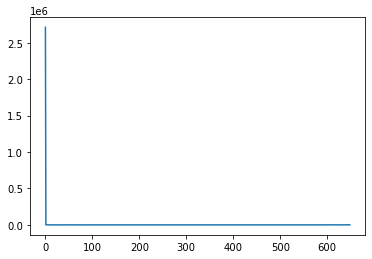

In [38]:
plt.plot(x)